# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [1]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from scipy.stats import stats
import seaborn as sns

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
#redefine categorial data sex, smoker and region.
from sklearn.preprocessing import LabelEncoder
sex=LabelEncoder()
data['sex']=sex.fit_transform(data['sex'].astype(str))
smoker=LabelEncoder()
data['smoker']=smoker.fit_transform(data['smoker'].astype(str))
region=LabelEncoder()
data['region']=region.fit_transform(data['region'].astype(str))
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [4]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [5]:
# check if there is any null data. As there is no null data this does not require and special processing.
data.isnull().values.any()

False

In [6]:
z = np.abs(stats.zscore(data))

In [7]:
data.shape

(1338, 7)

In [8]:
#Remove the outliers from the data where z threshold is less than 3
data = data[(z < 3).all(axis=1)]
data.shape

(1309, 7)

C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


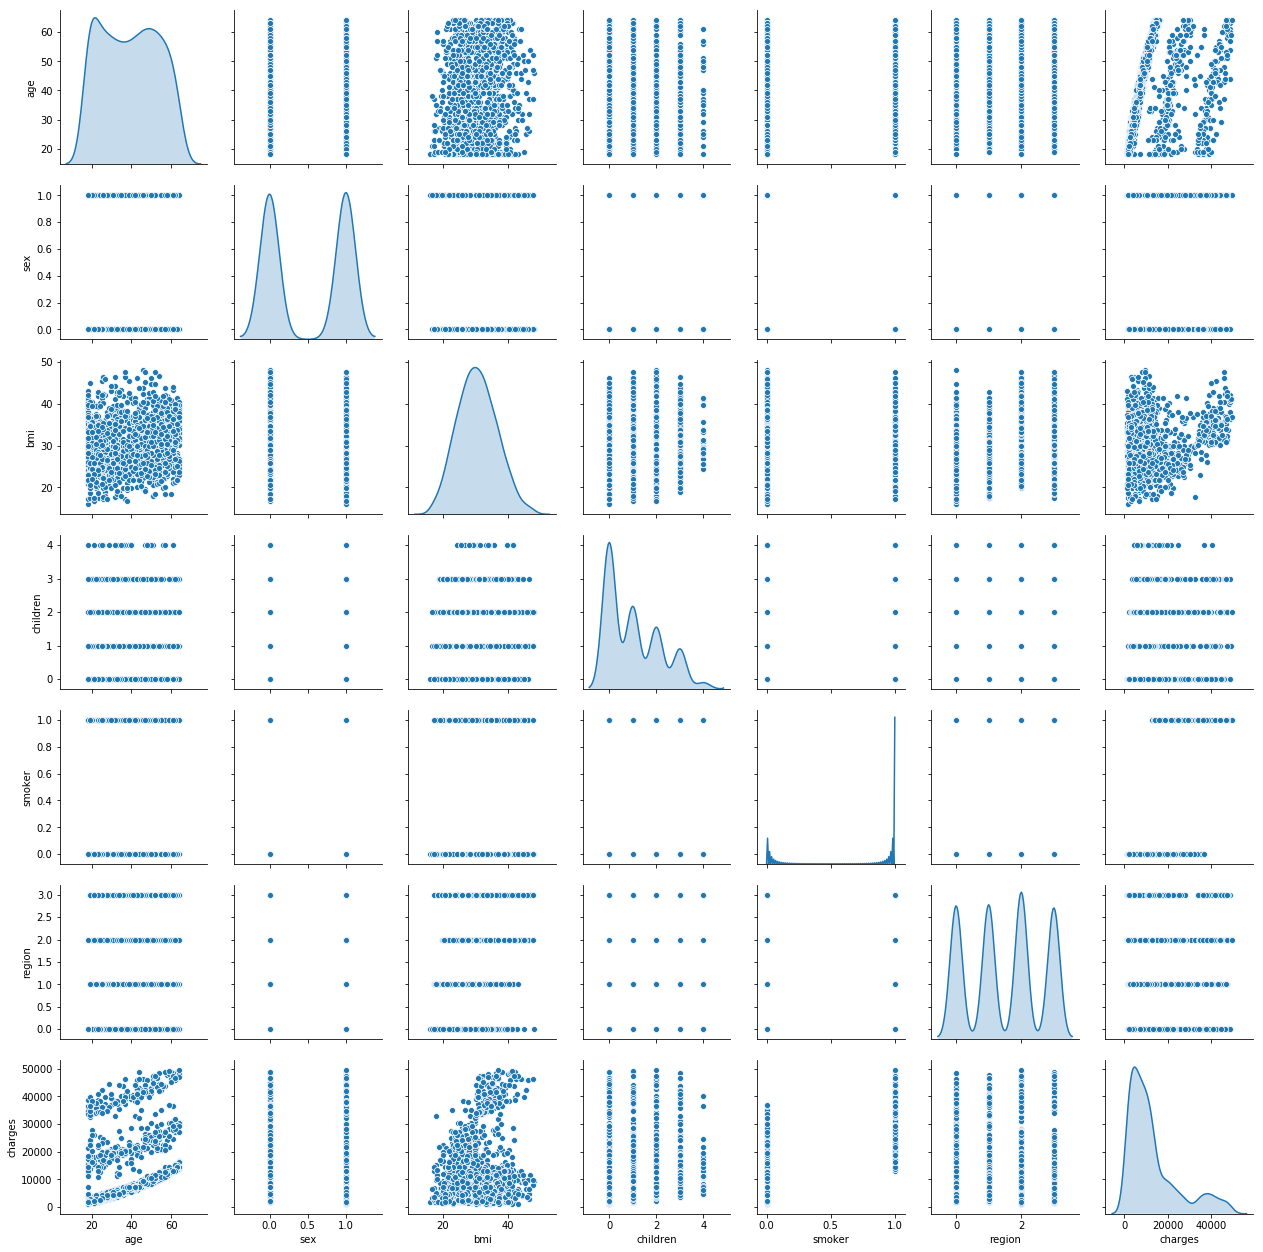

In [9]:
import seaborn as sns
sns.pairplot(data , diag_kind = 'kde')
# As age increases we can see that the charges increases.
# Smokers have higher charges than non smokers.
# regions and sex has no influence on the charges.

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [10]:
data.corr()
# charges and smoker is highly co-related.
# charges and region is very less co-related.

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019253,0.118178,0.059100,-0.029090,0.003121,0.305263
sex,-0.019253,1.000000,0.042498,0.014056,0.079058,0.003084,0.059455
bmi,0.118178,0.042498,1.000000,0.029916,-0.005288,0.160126,0.191453
children,0.059100,0.014056,0.029916,1.000000,0.028844,-0.002976,0.100438
smoker,-0.029090,0.079058,-0.005288,0.028844,1.000000,-0.003474,0.785129
region,0.003121,0.003084,0.160126,-0.002976,-0.003474,1.000000,-0.007633
charges,0.305263,0.059455,0.191453,0.100438,0.785129,-0.007633,1.000000


# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [11]:
#Treat “charges” as your Dependent Variable and Rest of the columns as Independent Variable and split the table
# Create a separate dataframe consisting only of the features i.e independent attributes
X = data.drop(labels= "charges" , axis = 1)
y = data[['charges']]

In [12]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((981, 6), (328, 6), (981, 1), (328, 1))

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [13]:
#already converted the categorical variables. 
#below code can be used for redefinig categorial data 'region' using get dummies
#df_with_dummies = pd.get_dummies(data['region'])
#frames1 = [data,df_with_dummies]
#data = pd.concat(frames1,axis=1)
#data.head()

# Question 6 - Train your model.

In [14]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [15]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 257.625470607106
The coefficient for sex is -182.21907030338534
The coefficient for bmi is 342.4189899508767
The coefficient for children is 582.0154980687604
The coefficient for smoker is 23225.68099354454
The coefficient for region is -379.8295581662942


In [16]:
# Let us check the intercept for the model
print ('Estimated intercept coefficient:',regression_model.intercept_)

Estimated intercept coefficient: [-12141.46837472]


# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [17]:
predicted_charges=regression_model.predict(X_test)
print(predicted_charges)

[[11156.41753916]
 [ 6177.20727086]
 [10290.27879275]
 [12296.97498333]
 [ 3368.65977597]
 [ 9289.39064792]
 [ 8523.56243472]
 [ 2635.14815268]
 [10239.30487264]
 [ 5614.05347658]
 [16153.67753816]
 [ 4869.80492919]
 [15903.71369633]
 [ 3063.94001444]
 [16562.22288502]
 [10205.14636319]
 [10251.50551721]
 [26106.45453604]
 [10888.09094998]
 [25488.32743197]
 [14894.82995124]
 [ 7535.96954312]
 [ 7194.27303972]
 [ 5558.68742344]
 [11269.03937571]
 [12824.27766552]
 [ 7621.77346427]
 [32782.36185557]
 [ 7650.29924633]
 [11591.47095457]
 [ 8858.40366404]
 [ 5558.83968344]
 [ 7195.67065551]
 [ 6590.17356222]
 [ 6686.51849043]
 [12222.31883185]
 [ 5405.35717004]
 [29634.91836631]
 [ 6057.08097909]
 [33554.36508826]
 [10407.93096227]
 [31329.23720825]
 [34037.95940456]
 [13064.17190107]
 [ 1083.65836417]
 [ 5190.32880251]
 [ 5086.95061321]
 [29578.6593375 ]
 [30390.14224578]
 [10525.74916592]
 [31237.09141394]
 [10349.23840114]
 [ 8308.95703216]
 [ 6892.2185108 ]
 [ 6631.75134837]
 [33157.94

In [18]:
acc = regression_model.score(X_test, y_test)
acc = acc * 100
print('Linear regression accuracy score during test: ',acc)

Linear regression accuracy score during test:  73.1994171108963


In [19]:
acc = regression_model.score(X_train, y_train)
acc = acc * 100
print('Linear regression accuracy score during training: ',acc)

Linear regression accuracy score during training:  75.89620977525084


In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred= regression_model.predict(X_test)
print ('Mean squared error is',mean_squared_error(y_test, y_pred))
root = sqrt(mean_squared_error(y_test, y_pred))
print ('Root Mean squared error is',root)

Mean squared error is 33479281.341385342
Root Mean squared error is 5786.128355073481


In [21]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error is ', mean_absolute_error(y_test, y_pred))

Mean absolute error is  3981.2408937814826


In [22]:
from sklearn.metrics import r2_score
print('R Square for the model is ',r2_score(y_test, y_pred))

R Square for the model is  0.731994171108963


# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [23]:
data_Iris = pd.read_csv('Iris.csv')
data_Iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
data_Iris.info()
#No null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Species                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


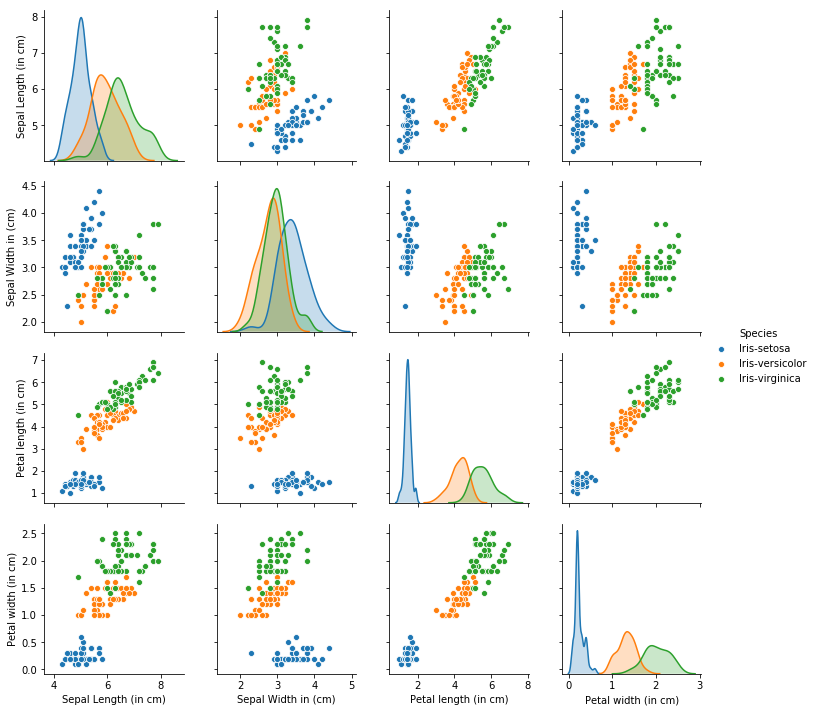

In [25]:
sns.pairplot(data_Iris , diag_kind = 'kde', hue='Species')
#iris-setosa is distinctly different from those of the other two species.
# spots of Iris-versicolor and iris-virginica overlap each other.

## Question 11- Do Feature Scaling 

In [26]:
# All the independent variables are in "cm" so there is no need of feature scaling
# Naive Bayes is not Distance based so not affected by Feature Scaling

## Question 12- Train and Fit NaiveBayes Model

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
X = data_Iris.drop(labels= "Species" , axis = 1)
#y = data_Iris[['Species']]
y = data_Iris.pop('Species')

In [29]:
# Split X and y into training and test set in 70:30 ratio
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [30]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB(priors=None)

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [31]:
model.score(train_set , train_labels)

0.9523809523809523

In [34]:
from sklearn import metrics
test_pred = model.predict(test_set)
print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))
print(metrics.accuracy_score(test_labels, test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

    avg / total       0.94      0.93      0.93        45

[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]
0.9333333333333333


# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=1)
rfcl.fit(train_set, train_labels)

C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [36]:
test_pred_RF = rfcl.predict(test_set)
print(metrics.classification_report(test_labels, test_pred_RF))
print(metrics.confusion_matrix(test_labels, test_pred_RF))
print(metrics.accuracy_score(test_labels, test_pred_RF))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

    avg / total       0.96      0.96      0.96        45

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
0.9555555555555556


## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier()
gboost.fit(train_set, train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [38]:
test_pred_gb = gboost.predict(test_set)
print(metrics.classification_report(test_labels, test_pred_gb))
print(metrics.confusion_matrix(test_labels, test_pred_gb))
print(metrics.accuracy_score(test_labels, test_pred_gb))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

    avg / total       0.96      0.96      0.96        45

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
0.9555555555555556
